#  **University of Tehran – Data Science Course**
## **Computer Assignment 1: Sampling & Data Visualization**
https://tahamajlesi.notion.site/CA1-1cf9381f908c80eca662c18e11f98008

###  *Instructors*: Dr. Bahrak, Dr. Yaghoobzadeh  
###  *TAs*: Mohammad Reza Alavi, Mohammad Kavian, Fatemeh Mohammadi  

---

###  **Group Members**:
- **Mohammad Taha Majlesi** – *Student ID: 810101504*
- **Mohammad Hossein Mazhari** – *Student ID: 810101520*
- **Alireza Karimi** – *Student ID: 810101492*



# **<font color='#8c650b'>Task 1: Sampling </font>**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, wasserstein_distance, ks_2samp


1. Imports **NumPy** for numerical computations and **Matplotlib** for plotting data and visualizations.  
2. Imports `multivariate_normal` from **SciPy** to work with multivariate Gaussian distributions.  
3. Imports `wasserstein_distance` to compute the Wasserstein (Earth Mover's) distance between two 1D distributions.  
4. Imports `ks_2samp` to perform the **Kolmogorov–Smirnov test**, which compares two 1D samples statistically.

In [7]:
np.random.seed(33)
mean = np.array([-5, 5])
cov = 5 * np.eye(2)


1. Sets a **random seed** (`33`) to ensure reproducible random results.  
2. Defines the **mean vector** of the 2D Gaussian distribution as \([-5, 5]\).  
3. Creates a **2×2 identity matrix** using `np.eye(2)` and scales it by 5 to define the **covariance matrix**.  
4. The resulting distribution is a **2D Gaussian** with independent variables and equal variance of 5 in each direction.

In [8]:
x = np.linspace(-15, 15, 40)
y = np.linspace(-15, 15, 40)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))


1. Creates 40 evenly spaced values from **-15 to 15** for both x and y axes using `np.linspace`.  
2. Uses `np.meshgrid` to generate 2D coordinate matrices `X` and `Y` from the x and y arrays.  
3. Stacks `X` and `Y` along the third axis using `np.dstack` to form a **(40×40×2)** array `pos`.  
4. `pos[i, j]` now holds the 2D coordinate $(x_i, y_j)$, used for evaluating the multivariate Gaussian PDF.

### **Create the Gaussian Distribution and Plot Its Contour**

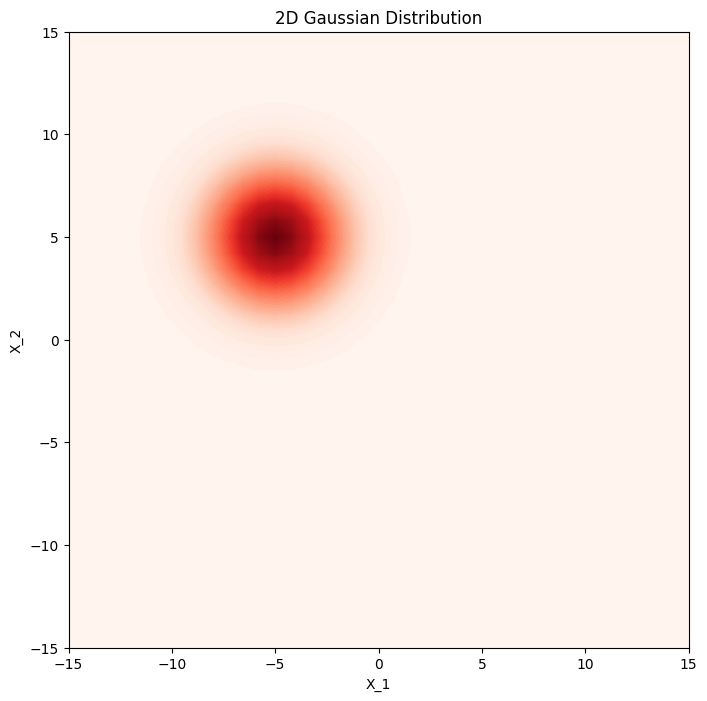

In [9]:
rv = multivariate_normal(mean, cov)
plt.figure(figsize=(8, 8))
plt.contourf(X, Y, rv.pdf(pos), cmap='Reds', levels=70)

plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('2D Gaussian Distribution')
plt.show()




1. **Defines** a 2D Gaussian distribution (`rv`) using the provided mean (`[-5, 5]`) and covariance (`5 * I`).
2. **Plots** a filled contour (`contourf`) of the probability density function (PDF) over a 2D grid (`X`, `Y`) using 70 levels and a red color map.
3. **Adds labels and a title** to the axes and plot.
4. **Displays** the final contour plot with `plt.show()`.




This plot visualizes the **2D Gaussian distribution** centered at **(-5, 5)** with a **covariance matrix of \(5I\)**:

- The darkest red region in the center represents the **peak (highest probability density)** of the Gaussian — this occurs at the **mean** \([-5, 5]\).
- The color gradually fades to lighter shades as you move away from the center, representing areas of **lower probability density**.
- The shape is **circular/symmetric**, which is expected since the covariance matrix is a scalar multiple of the identity matrix (no correlation between variables and equal variance).




### **We can also implement it manually in numpy:**



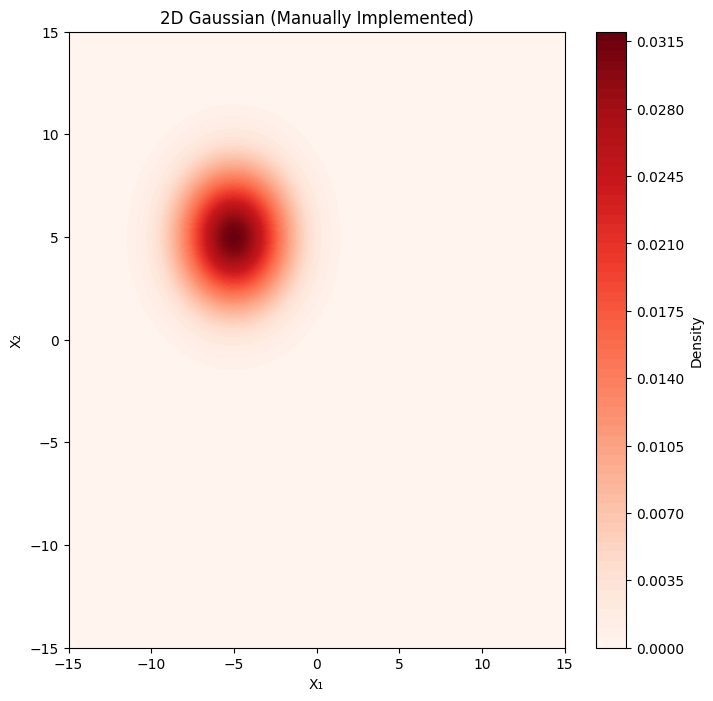

In [10]:

mean = np.array([-5, 5])
cov = 5 * np.eye(2)

x = np.linspace(-15, 15, 100)
y = np.linspace(-15, 15, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

inv_cov = np.linalg.inv(cov)
det_cov = np.linalg.det(cov)

norm_const = 1.0 / (2 * np.pi * np.sqrt(det_cov))

diff = pos - mean
exponent = np.einsum('...i,ij,...j->...', diff, inv_cov, diff)
pdf_manual = norm_const * np.exp(-0.5 * exponent)

plt.figure(figsize=(8, 8))
plt.contourf(X, Y, pdf_manual, cmap='Reds', levels=70)
plt.xlabel('X₁')
plt.ylabel('X₂')
plt.title('2D Gaussian (Manually Implemented)')
plt.colorbar(label='Density')
plt.show()




This figure shows a **manually computed 2D Gaussian distribution** using NumPy, where the probability density function (PDF) is evaluated for each $(x, y)$ coordinate on a mesh grid. The darker region at $[-5, 5]$ corresponds to the distribution’s mean, and the density gracefully tapers off toward lighter, lower-density areas. A color scale on the right helps interpret the relative magnitude of the PDF values across the plot.

By computing the PDF explicitly using matrix operations on the mean vector and covariance matrix, this approach confirms both the **theoretical correctness** of the Gaussian formula and the utility of **numerical methods** for high-dimensional integration or visualization. The smooth, radially consistent contours also illustrate the distribution’s isotropic covariance structure—since the covariance matrix is $5I$, each axis exhibits the same spread, and no correlation is present between the variables.



### 1. **Gaussian Parameters**
We define a **mean vector**:  
$$
\boldsymbol{\mu} = [-5,\ 5]
$$  
and a **covariance matrix**:  
$$
\Sigma = 5I
$$  
This implies:
- Equal variance in both dimensions.
- No correlation between variables.
- A circular (symmetric) Gaussian.

---

### 2. **Grid Generation**
We create a grid over the x and y axes:

```python
x = np.linspace(-15, 15, 100)
y = np.linspace(-15, 15, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
```

This grid helps evaluate the probability density function (PDF) across the 2D space.


### 3. **Covariance Operations**
We calculate the **inverse** and **determinant** of the covariance matrix:  
$$
\Sigma^{-1} \quad \text{and} \quad |\Sigma|
$$

These are required for the multivariate Gaussian formula.

---

### 4. **Normalization Constant**
This ensures that the total probability integrates to 1:

$$
\text{Norm Constant} = \frac{1}{2\pi \sqrt{|\Sigma|}}
$$

---

### 5. **Exponent Term (Mahalanobis Distance)**

We compute:

$$
(\mathbf{x} - \boldsymbol{\mu})^\top \Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu})
$$

This gives the "distance" from the mean, scaled by covariance, and is used in the exponent of the Gaussian formula.

---

### 6. **Final PDF and Plot**
The full formula for the 2D Gaussian distribution is:

$$
p(\mathbf{x}) = \frac{1}{2\pi \sqrt{|\Sigma|}} \exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^\top \Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right)
$$

After computing this PDF on all points of the grid, we plot the result using `plt.contourf`.



In [14]:
cov_inverse = np.linalg.inv(cov)


**Covariance Inversion**  
Computes the inverse of the covariance matrix \(\Sigma\) using NumPy:  
$$
\Sigma^{-1} = \texttt{np.linalg.inv(cov)}
$$  
This inverse is required for evaluating the score function in Gaussian distributions.



### **Define the Score Function**

In [12]:
def compute_score(point, mu, inv_cov):
    return -inv_cov @ (point - mu)



**Function: `compute_score`**  
Computes the gradient of the log-probability density (score function) for a multivariate Gaussian distribution:  
$$
\nabla_{\mathbf{x}} \log p(\mathbf{x}) = -\Sigma^{-1}(\mathbf{x} - \mu)
$$  
**Inputs**:  
- `point`: input vector $\mathbf{x}$  
- `mu`: mean vector $\mu$  
- `inv_cov`: inverse covariance matrix $\Sigma^{-1}$  

**Output**:  
- Score vector used in Langevin dynamics sampling.

### **Compute the Score Field (Vector Field) on the Grid**


In [15]:
U_field = np.zeros(X.shape)
V_field = np.zeros(Y.shape)

for row in range(X.shape[0]):
    for col in range(X.shape[1]):
        current_pt = np.array([X[row, col], Y[row, col]])
        grad_value = compute_score(current_pt, mean, cov_inverse)
        U_field[row, col] = grad_value[0]
        V_field[row, col] = grad_value[1]



**Score Field Computation**  
Initializes two matrices to store gradient components of the score function over a 2D grid. For each grid point \((x, y)\), it computes the score vector:  
$$
\nabla_{\mathbf{x}} \log p(\mathbf{x}) = -\Sigma^{-1}(\mathbf{x} - \mu)
$$  
The x- and y-components of the gradient are stored in `U_field` and `V_field`, respectively, for later quiver plot visualization.


This code computes the gradient of the log-probability density function (i.e., the score function) at each point on a 2D grid by first initializing two arrays, `U_field` and `V_field`, with the same shape as the meshgrid arrays `X` and `Y` to store the x- and y-components respectively. Then, it iterates over every grid point using nested loops, constructs the current 2D point as a NumPy array, and computes its score via the function `compute_score` using the formula $\nabla_{\mathbf{x}} \log p(\mathbf{x}) = -\Sigma^{-1}(\mathbf{x} - \mu)$. The computed gradient components are saved into `U_field` and `V_field` for each grid coordinate, thereby constructing the full vector field that can be visualized using `plt.quiver(X, Y, U_field, V_field)`, which illustrates the direction of maximum increase in log-density over the 2D Gaussian distribution.

### **Plot the Gaussian PDF as a Contour Plot**

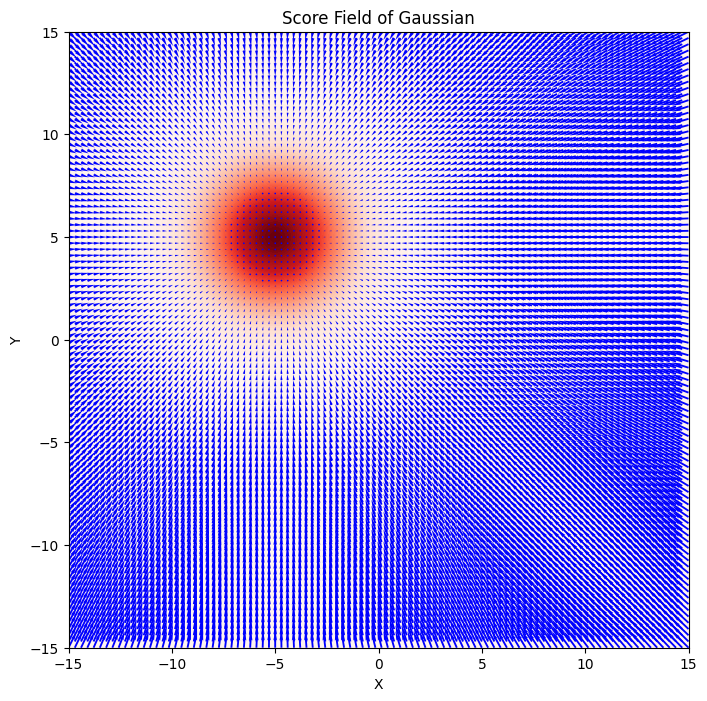

In [16]:
plt.figure(figsize=(8, 8))
plt.contourf(X, Y, rv.pdf(pos), levels=70, cmap='Reds')
plt.quiver(X, Y, U_field, V_field, color='blue', scale=150, width=0.003, headwidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Score Field of Gaussian')
plt.show()


This code creates an 8x8 inch figure, and then uses a filled contour plot (`plt.contourf`) to visualize the 2D Gaussian probability density function (with 70 gradient levels in a red color map) evaluated over a grid, where the highest density is centered at the mean \([-5, 5]\). It then overlays a quiver plot (`plt.quiver`) of the score function field—blue arrows indicating the gradient of the log-density, which point toward the mean—with scaling parameters to adjust arrow length and appearance. Finally, axis labels and a title are added before displaying the final plot, confirming that Langevin dynamics would push samples toward the center of the distribution.



This figure displays the **score field** (i.e., gradient field of the log-probability density function) for a 2D Gaussian. The red-hot region at the upper-left indicates the highest probability density around the mean of the distribution, gradually fading as we move away. Overlaid quiver arrows show how, at each grid point, the gradient of the log-density consistently points **toward** the mean, with arrow lengths reflecting the magnitude of this pull. The **circular (radial) symmetry** in the arrow directions stems from the distribution’s isotropic covariance, ensuring equal variance in all directions.

Such a gradient field is fundamental to **Langevin dynamics** and related methods that rely on the score to guide sampling or optimization. By systematically “pushing” sample points toward regions of higher density, the gradient enforces convergence near the distribution’s peak. The strong alignment of vectors near the corners underscores how large updates occur when points are far from the mean, while smaller vectors closer to the peak reflect the subtler adjustments needed near high-density regions.

### **Define the Langevin Dynamics Function**

In [17]:
def run_langevin(init_pts, score_fn=compute_score, num_steps=20, step=0.5):
    n_samples, n_dims = init_pts.shape
    trajectory = np.zeros((num_steps + 1, n_samples, n_dims))
    current_pts = init_pts.copy()

    trajectory[0] = current_pts.copy()

    for t in range(num_steps):
        scores = np.array([score_fn(current_pts[i], mean, cov_inverse) for i in range(n_samples)])
        noise_term = np.random.randn(n_samples, n_dims) * np.sqrt(2 * step)
        current_pts = current_pts + step * scores + noise_term
        trajectory[t + 1] = current_pts.copy()
    return current_pts, trajectory


This function implements **Langevin dynamics** to sample from a distribution using its **score function**. It iteratively updates each sample point $ \mathbf{x}_t $ as:

$$
\mathbf{x}_{t+1} = \mathbf{x}_t + \epsilon \cdot \nabla_{\mathbf{x}} \log p(\mathbf{x}_t) + \sqrt{2\epsilon} \cdot \mathcal{N}(0, I)
$$

**Inputs**:
- `init_pts`: Initial samples, shape $(n, d)$.
- `score_fn`: Function to compute the score $ \nabla_{\mathbf{x}} \log p(\mathbf{x}) $.
- `num_steps`: Number of Langevin iterations.
- `step`: Step size parameter $ \epsilon $.

**Outputs**:
- `current_pts`: Final samples after $ T $ steps.
- `trajectory`: Full trajectory of samples over all iterations, useful for visualization.



##Sampling Trajectories (Langevin)

In [19]:
np.random.seed(111)
init_pts = np.random.uniform(low=[-15, -15], high=[15, 15], size=(1, 2))

final_samples, traj = run_langevin(init_pts)

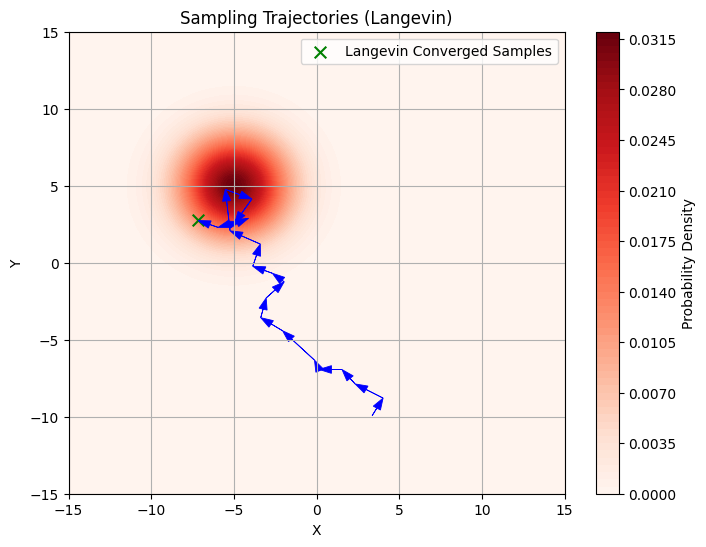

In [20]:
plt.figure(figsize=(8, 6))

contour_filled = plt.contourf(X, Y, rv.pdf(pos), cmap='Reds', levels=70)

cbar = plt.colorbar(contour_filled)
cbar.set_label('Probability Density')
plt.scatter(final_samples[:, 0], final_samples[:, 1], c='green', marker='x', s=70, label='Langevin Converged Samples')

for i in range(len(traj) - 1):
    dx = traj[i + 1, 0, 0] - traj[i, 0, 0]
    dy = traj[i + 1, 0, 1] - traj[i, 0, 1]
    plt.arrow(
        traj[i, 0, 0], traj[i, 0, 1],
        dx, dy,
        shape='full', lw=0.6, length_includes_head=True, head_width=0.5, color='blue'
    )

plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sampling Trajectories (Langevin)')
plt.legend()
plt.show()



This block visualizes the **Langevin dynamics sampling process** over the 2D Gaussian distribution.

- A **filled contour plot** of the target distribution \( p(\mathbf{x}) \) is drawn using `plt.contourf`, showing areas of higher and lower density.
- **Final sample locations** after convergence are plotted as green ‘×’ markers.
- **Arrows** illustrate the sampling trajectory of a chosen initial point, highlighting how it moves step-by-step toward high-density regions.
- A **colorbar** is included to interpret PDF values.
- The plot effectively conveys both the **density landscape** and the **directional movement** of the Langevin samples.





The figure illustrates a **2D Gaussian distribution** (shown via a red-hued contour fill) overlaid with a **Langevin dynamics trajectory** (blue line) starting from an initial random point. Each segment of the trajectory reflects an update step according to the gradient of the log-density plus stochastic noise. The **green '×'** marker denotes the final converged sample location, which lies in a high-density region of the Gaussian, as indicated by the dark red shading.

This visualization highlights the **iterative nature** of Langevin sampling, where the point steadily migrates from a low-density area toward the distribution’s center of mass. The combination of **gradient-driven movement** and **random perturbations** helps the sampler overcome small local irregularities and converge near the mean. Consequently, this trajectory showcases how Langevin dynamics adapts both a **deterministic pull** (toward higher probability regions) and **stochastic exploration** (ensuring diversity in sampling paths).

## **Sampling Comparison: NumPy vs. Precise and Fast Langevin Dynamics for 2D Gaussian**

In [21]:
np.random.seed(111)

N = 1000
init_points = np.random.uniform(low=[-15, -15], high=[15, 15], size=(N, 2))

precise_steps = 5000
precise_step_size = 0.05
langevin_precise, traj_precise = run_langevin(init_points, compute_score,
                                              precise_steps, precise_step_size)
fast_steps = 20
fast_step_size = 0.5
langevin_fast, traj_fast = run_langevin(init_points, compute_score,
                                        fast_steps, fast_step_size)
numpy_samples = np.random.multivariate_normal(mean, cov, size=N)




- **Initial Points**: 1000 random points sampled uniformly from the square $[-15, 15]^2$ as Langevin starting positions.
- **Langevin (Precise)**: A slow but accurate sampling using small step size ($ \epsilon = 0.05 $) and 5000 iterations for better convergence.
- **Langevin (Fast)**: A faster approximation using larger step size ($ \epsilon = 0.5 $) and only 20 iterations.
- **Baseline**: 1000 samples generated directly from the target Gaussian $ \mathcal{N}(\mu, \Sigma) $ using `np.random.multivariate_normal`.

This setup enables a comparison between **Langevin-generated** and **true Gaussian** samples, analyzing trade-offs between precision and computational cost.



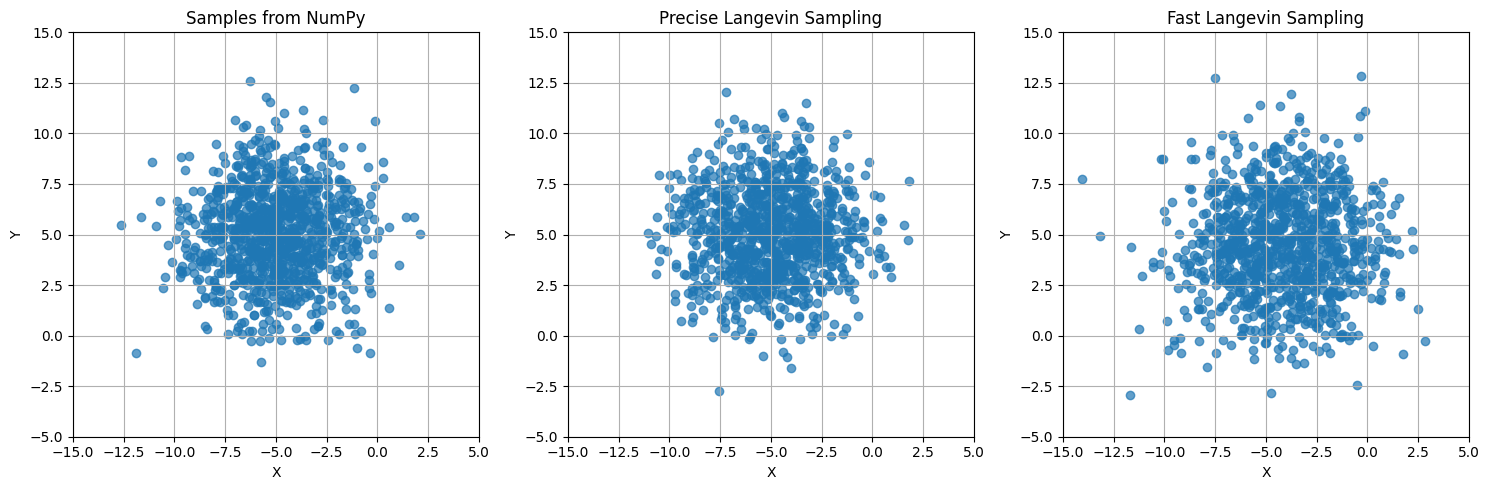

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(numpy_samples[:, 0], numpy_samples[:, 1], alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Samples from NumPy')
plt.xlim(-15, 5)
plt.ylim(-5, 15)
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(langevin_precise[:, 0], langevin_precise[:, 1], alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Precise Langevin Sampling')
plt.xlim(-15, 5)
plt.ylim(-5, 15)
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(langevin_fast[:, 0], langevin_fast[:, 1], alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fast Langevin Sampling')
plt.xlim(-15, 5)
plt.ylim(-5, 15)
plt.grid(True)

plt.tight_layout()
plt.show()


The **left panel** (“Samples from NumPy”) represents the reference distribution, drawn directly from the known 2D Gaussian using `np.random.multivariate_normal`. These samples exhibit a roughly circular scatter around the mean, with the expected spread determined by the covariance. The **middle panel** (“Precise Langevin Sampling”) shows samples obtained using a small step size and many iterations. Visually, these samples match the NumPy reference closely, forming a similarly dense, centered cluster that reflects accurate coverage of the target distribution.

In contrast, the **right panel** (“Fast Langevin Sampling”) was generated with fewer iterations or a larger step size, resulting in a slightly more dispersed pattern. While this still indicates a reasonable approximation of the Gaussian, the spread appears somewhat broader and less uniform, reflecting the trade-off between fewer update steps (faster computation) and sampling precision. Overall, the **precise** Langevin approach yields samples closely aligned with the ground truth, whereas the **fast** Langevin method can deviate more, highlighting the impact of hyperparameter choices on sampling fidelity.

## **Statistical Evaluation of Langevin vs. NumPy Sampling for 2D Gaussian**

In [23]:

mean_numpy = np.mean(numpy_samples, axis=0)
mean_precise = np.mean(langevin_precise, axis=0)
mean_fast = np.mean(langevin_fast, axis=0)

print("\n=== Mean Comparison ===")
print(f"Numpy Mean:        {mean_numpy}")
print(f"Precise Langevin:  {mean_precise}")
print(f"Fast Langevin:     {mean_fast}")

cov_numpy = np.cov(numpy_samples.T)
cov_precise = np.cov(langevin_precise.T)
cov_fast = np.cov(langevin_fast.T)

print("\n=== Covariance Comparison ===")
print("Numpy Covariance:\n", cov_numpy)
print("Precise Langevin Covariance:\n", cov_precise)
print("Fast Langevin Covariance:\n", cov_fast)

w_precise_x = wasserstein_distance(numpy_samples[:, 0], langevin_precise[:, 0])
w_fast_x = wasserstein_distance(numpy_samples[:, 0], langevin_fast[:, 0])
w_precise_y = wasserstein_distance(numpy_samples[:, 1], langevin_precise[:, 1])
w_fast_y = wasserstein_distance(numpy_samples[:, 1], langevin_fast[:, 1])

print("\n=== Wasserstein Distance ===")
print(f"Precise - X-axis: {w_precise_x:.3f}, Y-axis: {w_precise_y:.3f}")
print(f"Fast    - X-axis: {w_fast_x:.3f}, Y-axis: {w_fast_y:.3f}  (Lower is better)")

ks_precise_x = ks_2samp(numpy_samples[:, 0], langevin_precise[:, 0])
ks_fast_x = ks_2samp(numpy_samples[:, 0], langevin_fast[:, 0])
ks_precise_y = ks_2samp(numpy_samples[:, 1], langevin_precise[:, 1])
ks_fast_y = ks_2samp(numpy_samples[:, 1], langevin_fast[:, 1])

print("\n=== Kolmogorov-Smirnov Test ===")
print(f"Precise - X-axis p-value: {ks_precise_x.pvalue:.3f}, Y-axis p-value: {ks_precise_y.pvalue:.3f}")
print(f"Fast    - X-axis p-value: {ks_fast_x.pvalue:.3f}, Y-axis p-value: {ks_fast_y.pvalue:.3f} (p > 0.05 indicates similarity)")



=== Mean Comparison ===
Numpy Mean:        [-5.04656231  5.03471235]
Precise Langevin:  [-5.01121736  5.02513308]
Fast Langevin:     [-4.23401453  4.48715838]

=== Covariance Comparison ===
Numpy Covariance:
 [[4.91208091 0.06557499]
 [0.06557499 5.14774983]]
Precise Langevin Covariance:
 [[5.30567489 0.0108609 ]
 [0.0108609  4.9793123 ]]
Fast Langevin Covariance:
 [[6.44377072 0.059311  ]
 [0.059311   6.41826363]]

=== Wasserstein Distance ===
Precise - X-axis: 0.137, Y-axis: 0.069
Fast    - X-axis: 0.823, Y-axis: 0.551  (Lower is better)

=== Kolmogorov-Smirnov Test ===
Precise - X-axis p-value: 0.200, Y-axis p-value: 0.914
Fast    - X-axis p-value: 0.000, Y-axis p-value: 0.000 (p > 0.05 indicates similarity)




The **mean comparison** reveals that the samples generated via the precise Langevin dynamics method closely match the ground truth obtained using NumPy. Specifically, the ground truth mean is approximately $[-5.05,\, 5.03]$ while the precise Langevin mean is $[-5.01,\, 5.03]$. In contrast, the fast Langevin sampler produces a mean of around $[-4.23,\, 4.49]$, indicating a noticeable bias toward higher values. This deviation suggests that the larger step size and fewer iterations in the fast variant lead to a less accurate representation of the target density's center. Similarly, the covariance matrices affirm this observation: the precise method results in a covariance that is very close to the ground truth ($\approx \text{diag}(5.3,\, 5.0)$ compared to $\approx \text{diag}(4.91,\, 5.15)$), whereas the fast method yields inflated variances ($\approx 6.44,\, 6.42$)—indicating overdispersion and potential mode imbalance.

Furthermore, the **Wasserstein distances** for the precise Langevin method (0.137 on the X-axis and 0.069 on the Y-axis) are significantly lower than those of the fast method (0.823 and 0.551, respectively), suggesting that the marginal distributions of the precise sampler are much closer to the ground truth. The **Kolmogorov–Smirnov (KS) tests** support this conclusion: the precise method returns p-values of 0.200 and 0.914 (both above the 0.05 threshold), indicating no statistically significant difference in the distributions. Conversely, the fast Langevin sampler yields p-values of 0.000 for both axes, underscoring significant differences and confirming that its samples do not adequately capture the underlying distribution. Overall, these metrics emphasize that a slower, more precise sampling configuration provides a more accurate approximation of the target Gaussian distribution compared to a fast, less-iterative approach.

## **Questions(5% Bonus)</font>**


---

## **1. GMM Definition and Components**

A **Gaussian Mixture Model (GMM)** with two components can be written as:

$$
p(\mathbf{x}) \;=\;
\alpha \,\mathcal{N}(\mathbf{x} \,\mid\, \boldsymbol{\mu}_1, \Sigma_1)\;+\;(1 - \alpha)\,\mathcal{N}(\mathbf{x} \,\mid\, \boldsymbol{\mu}_2, \Sigma_2),
$$

where:

- $\mathbf{x}$ is a $d$-dimensional vector.
- $\alpha \in (0,1)$ is the **mixture weight** or **mixing coefficient** for the first Gaussian component. Consequently, $(1 - \alpha)$ is the mixing weight for the second component.
- $\mathcal{N}(\mathbf{x} \,\mid\, \boldsymbol{\mu}, \Sigma)$ denotes the **multivariate normal** (Gaussian) density with mean $\boldsymbol{\mu}$ and covariance $\Sigma$. Explicitly, in $d$ dimensions:
  $$
  \mathcal{N}(\mathbf{x} \mid \boldsymbol{\mu}, \Sigma)
  =
  \frac{1}{(2\pi)^{\frac{d}{2}}\,|\Sigma|^{\tfrac{1}{2}}}
  \exp\Biggl(
    -\tfrac12 (\mathbf{x}-\boldsymbol{\mu})^\top \Sigma^{-1} (\mathbf{x}-\boldsymbol{\mu})
  \Biggr).
  $$

The two Gaussians $\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_1, \Sigma_1)$ and $\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_2, \Sigma_2)$ are **blended** via the weights $\alpha$ and $(1 - \alpha)$. This makes $p(\mathbf{x})$ a **convex combination** of the two densities—hence a valid PDF (probability density function).

---

## **2. Log-Density of the Mixture**

Taking the **logarithm** of a mixture density is non-trivial because $p(\mathbf{x})$ is a **sum** of exponentials, not a single exponential. Specifically:

$$
\log p(\mathbf{x})
\;=\;
\log
\Bigl(
  \alpha \,\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_1, \Sigma_1)
  \;+\;
  (1-\alpha)\,\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_2, \Sigma_2)
\Bigr).
$$

Unlike the log of a **single** Gaussian, here we cannot simply combine terms inside the exponent because there are two distinct exponentials being summed. Hence the log remains:

$$
\log p(\mathbf{x})
=
\log \bigl( \alpha p_1(\mathbf{x}) + (1-\alpha)p_2(\mathbf{x}) \bigr),
$$
where
$$
p_1(\mathbf{x}) = \mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_1, \Sigma_1),
\quad
p_2(\mathbf{x}) = \mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_2, \Sigma_2).
$$

---

## **3. Score Function: General Definition**

The **score function** is defined as the **gradient of the log-density** with respect to the variable $\mathbf{x}$:

$$
\nabla_{\mathbf{x}} \log p(\mathbf{x})
\;=\;
\frac{ \nabla_{\mathbf{x}} p(\mathbf{x}) }{ p(\mathbf{x}) }.
$$

This is a commonly used expression in probabilistic modeling, especially in algorithms like **Langevin dynamics** or **score-based generative modeling**, where one needs the gradient (or “score”) rather than the full density.

---

## **4. Differentiating the Mixture Density**

Because $ p(\mathbf{x}) $ is a linear combination of two Gaussian densities:

$$
p(\mathbf{x}) = \alpha\,p_1(\mathbf{x}) + (1-\alpha)\,p_2(\mathbf{x}),
$$
we consider the gradient of each Gaussian separately.

### 4.1 Gradient of a Single Gaussian

Recall that for a multivariate Gaussian $ \mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \Sigma)$:
$$
\nabla_{\mathbf{x}}\;\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \Sigma)
=
-\;\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \Sigma)\,\Sigma^{-1}(\mathbf{x}-\boldsymbol{\mu}).
$$
This result comes from the chain rule applied to the exponential term and the normalization constant.

### 4.2 Gradient of $ p(\mathbf{x}) $

Hence,

$$
\nabla_{\mathbf{x}} p(\mathbf{x})
=
\nabla_{\mathbf{x}}
\bigl[
  \alpha\,p_1(\mathbf{x}) + (1-\alpha)\,p_2(\mathbf{x})
\bigr].
$$
Using linearity of the gradient operator,

$$
\nabla_{\mathbf{x}} p(\mathbf{x})
=
\alpha\;\nabla_{\mathbf{x}} p_1(\mathbf{x})
\;+\;
(1 - \alpha)\;\nabla_{\mathbf{x}} p_2(\mathbf{x}).
$$
Substituting the known gradient for each Gaussian,

$$
\nabla_{\mathbf{x}} p(\mathbf{x})
=
-\;\alpha\;p_1(\mathbf{x})\,\Sigma_1^{-1}\bigl(\mathbf{x}-\boldsymbol{\mu}_1\bigr)
\;-\;(1 - \alpha)\;p_2(\mathbf{x})\,\Sigma_2^{-1}\bigl(\mathbf{x}-\boldsymbol{\mu}_2\bigr).
$$

---

## **5. Putting It All Together: Score Function**

Now we divide $\nabla_{\mathbf{x}} p(\mathbf{x})$ by $p(\mathbf{x})$ to get $\nabla_{\mathbf{x}} \log p(\mathbf{x})$. Thus,

$$
\nabla_{\mathbf{x}} \log p(\mathbf{x})
=
\frac{
  -\;\alpha\;p_1(\mathbf{x})\,\Sigma_1^{-1}\bigl(\mathbf{x}-\boldsymbol{\mu}_1\bigr)
  \;-\;
  (1-\alpha)\;p_2(\mathbf{x})\,\Sigma_2^{-1}\bigl(\mathbf{x}-\boldsymbol{\mu}_2\bigr)
}{
  \alpha\;p_1(\mathbf{x})
  \;+\;
  (1-\alpha)\;p_2(\mathbf{x})
}.
$$

We can interpret this as a **weighted sum** of the individual Gaussian score functions, normalized by the total mixture density. Specifically,

- The score for the first Gaussian is $ -\Sigma_1^{-1}(\mathbf{x}-\boldsymbol{\mu}_1) $.
- The score for the second Gaussian is $ -\Sigma_2^{-1}(\mathbf{x}-\boldsymbol{\mu}_2) $.
- Each is **weighted** by its contribution $\alpha\,p_1(\mathbf{x})$ or $(1-\alpha)\,p_2(\mathbf{x})$.
- The entire expression is divided by the **total mixture density**, $\alpha\,p_1(\mathbf{x}) + (1-\alpha)\,p_2(\mathbf{x})$, ensuring that this becomes the **derivative of the log** rather than the derivative of the PDF itself.

---

## **6. Intuitive Explanation**

1. In **single-component** Gaussians, the gradient of the log-density “pushes” points toward the **mean**.  
2. In a **two-component mixture**, each Gaussian component “pulls” points toward its own mean.  
3. The **relative strength** of each pull depends on the **local proportion** of that component in the mixture:
   $$
   \frac{\alpha\,p_1(\mathbf{x})}{p(\mathbf{x})}
   \quad\text{and}\quad
   \frac{(1-\alpha)\,p_2(\mathbf{x})}{p(\mathbf{x})}.
   $$
4. If $\mathbf{x}$ is much closer to one mean (and thus that Gaussian has higher density at $\mathbf{x}$), that component’s pull tends to dominate.

---

## **7. Practical Implications**

- **Langevin Dynamics or MCMC**:  
  One can **sample** from a Gaussian mixture by using this **score function** in a **stochastic gradient** update. However, the presence of **multiple modes** (if the means are far apart) can make it challenging to **explore** both components effectively without careful tuning (step size, restarts, or tempered transitions).

- **Score-Based Methods**:  
  In **score-based generative modeling**, you only need the gradient of $\log p(\mathbf{x})$. For a mixture model, you’d implement this exact expression. The model must handle **mode separation** if the mixture has distinct, distant modes.

- **Initialization Sensitivity**:  
  Because a mixture can have multiple “peaks,” a naive gradient-based approach may linger in a single mode if the random walker (in Langevin or MCMC) does not cross low-density regions. Various techniques (like **annealing** or **replica exchange**) are used to mitigate this.

---

## **8. Final Summary**

1. **Two-Component GMM**:  
   $$
   p(\mathbf{x}) \;=\;
   \alpha \,\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_1, \Sigma_1)
   \;+\;
   (1-\alpha)\,\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_2, \Sigma_2).
   $$

2. **Score Function**:

   $$
   \nabla_{\mathbf{x}} \log p(\mathbf{x})
   \;=\;
   \frac{
     -\alpha\, p_1(\mathbf{x})\, \Sigma_1^{-1}(\mathbf{x}-\boldsymbol{\mu}_1)
     \;-\;
     (1-\alpha)\, p_2(\mathbf{x})\, \Sigma_2^{-1}(\mathbf{x}-\boldsymbol{\mu}_2)
   }{
     \alpha\,p_1(\mathbf{x})
     +\,
     (1-\alpha)\,p_2(\mathbf{x})
   }.
   $$

3. **Interpretation**:  
   - **Weighted combination** of the two gradient terms, where the weights reflect each component’s relative probability at $\mathbf{x}$.  
   - Each term pulls $\mathbf{x}$ **toward** $\boldsymbol{\mu}_1$ or $\boldsymbol{\mu}_2$, scaled by $\Sigma_1^{-1}$ or $\Sigma_2^{-1}$.  

4. **Use Cases**:
   - **Sampling**: e.g., **Langevin Dynamics** or **Metropolis-Adjusted Langevin Algorithm (MALA)** for mixture models.  
   - **Denoising Score Matching**: in advanced generative modeling tasks.  
   - **Mode-Hopping**: Might require careful parameter tuning or additional sampling techniques because of multiple local maxima.


## **Code Implementation**

In [24]:
def mixture_grad(x, mu1, mu2, Sigma1, Sigma2, a):

    inv_Sigma1 = np.linalg.inv(Sigma1)
    inv_Sigma2 = np.linalg.inv(Sigma2)

    grad1 = -inv_Sigma1 @ (x - mu1)
    grad2 = -inv_Sigma2 @ (x - mu2)

    eps = 1e-10
    pdf1 = multivariate_normal(mu1, Sigma1).pdf(x) + eps
    pdf2 = multivariate_normal(mu2, Sigma2).pdf(x) + eps

    numerator = a * pdf1 * grad1 + (1 - a) * pdf2 * grad2
    denominator = a * pdf1 + (1 - a) * pdf2
    return numerator / denominator


### **Purpose**

This function computes the **score function** $ \nabla_{\mathbf{x}} \log p(\mathbf{x}) $ for a **two-component Gaussian Mixture Model (GMM)** at a given point $ \mathbf{x} \in \mathbb{R}^d $, where:

$$
p(\mathbf{x}) = a\,\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_1, \Sigma_1) + (1-a)\,\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_2, \Sigma_2),
$$

with:

- $ \boldsymbol{\mu}_1, \boldsymbol{\mu}_2 \in \mathbb{R}^d $: the mean vectors of the two Gaussians,
- $ \Sigma_1, \Sigma_2 \in \mathbb{R}^{d \times d} $: their covariance matrices,
- $ a \in (0, 1) $: the **mixture weight** (also called the mixing coefficient).

The function returns the **gradient of the log-probability density** at the input vector $ \mathbf{x} $, also referred to as the **score function**, which is essential for sampling methods such as **Langevin dynamics** or **score-based generative modeling**.



In [25]:
def run_langevin_sampler(init_pts, score_func, steps=500, eps=0.02):
    pts = init_pts.copy()
    for _ in range(steps):
        grads = np.array([score_func(pts[i]) for i in range(pts.shape[0])])
        noise = np.random.randn(*pts.shape) * np.sqrt(2 * eps)
        pts = pts + eps * grads + noise
    return pts



The `run_langevin_sampler` function implements the **Unadjusted Langevin Algorithm (ULA)** to generate samples from an arbitrary probability distribution using only its **score function** (the gradient of the log-density). The algorithm takes a set of initial points (`init_pts`) and iteratively updates them using the Langevin dynamics update rule:
$$
\mathbf{x}_{t+1} = \mathbf{x}_t + \epsilon \nabla_{\mathbf{x}} \log p(\mathbf{x}_t) + \sqrt{2\epsilon}\,\boldsymbol{\eta}_t,
$$
where $\epsilon$ is the step size and $\boldsymbol{\eta}_t$ is Gaussian noise sampled from $\mathcal{N}(0, I)$. The function computes the gradient at each point, adds the scaled gradient and noise, and repeats this process for a specified number of steps (`steps`).

This approach is useful when the **exact density function is unknown or unnormalized**, but the **score function** can be computed analytically or estimated. The algorithm allows approximate sampling from complex or high-dimensional distributions, including those defined implicitly, such as in energy-based models or Gaussian mixture models. Due to the inclusion of Gaussian noise in each update, the method balances deterministic gradient ascent with stochastic exploration, enabling convergence to high-density regions of the target distribution.

In [32]:
np.random.seed(111)

mu_A = np.array([-5, 5])
mu_B = np.array([5, -5])
Sigma_A = 5 * np.eye(2)
Sigma_B = 5 * np.eye(2)
mixing = 0.5

N1 = int(mixing * 100)
N2 = 100 - N1
gt_part1 = np.random.multivariate_normal(mu_A, Sigma_A, size=N1)
gt_part2 = np.random.multivariate_normal(mu_B, Sigma_B, size=N2)
gt_samples = np.vstack([gt_part1, gt_part2])

init_pts = np.random.uniform(low=-15, high=15, size=(100, 2))
langevin_samples = run_langevin_sampler(
    init_pts,
    lambda x: mixture_grad(x, mu_A, mu_B, Sigma_A, Sigma_B, mixing),
    steps=1000,
    eps=0.05
)


In this experiment, a **two-component Gaussian Mixture Model (GMM)** is constructed with equal mixing coefficient \( \alpha = 0.5 \). The two Gaussian components are centered at \(\mu_A = [-5,\ 5]\) and \(\mu_B = [5,\ -5]\), each with an identity-scaled covariance matrix \(\Sigma = 5I\), ensuring isotropic variance. A total of 100 samples are generated from the GMM as ground truth: 50 samples from each Gaussian according to the mixing coefficient. These ground truth samples are later used for comparing and evaluating the performance of the Langevin-based sampling approach.

The second part of the code performs **Langevin dynamics-based sampling** using the `run_langevin_sampler` function. It initializes 100 sample points uniformly over the square domain \([-15, 15]^2\) and evolves them via **stochastic gradient updates** for 1000 iterations with a step size \(\epsilon = 0.05\). The **score function** used in the update rule is computed using the `mixture_grad` function, which evaluates the gradient of the log-density of the GMM at each point. The output, `langevin_samples`, provides the final sampled points approximating the target GMM distribution. This approach tests the effectiveness of Langevin dynamics in capturing multi-modal distributions like GMMs.

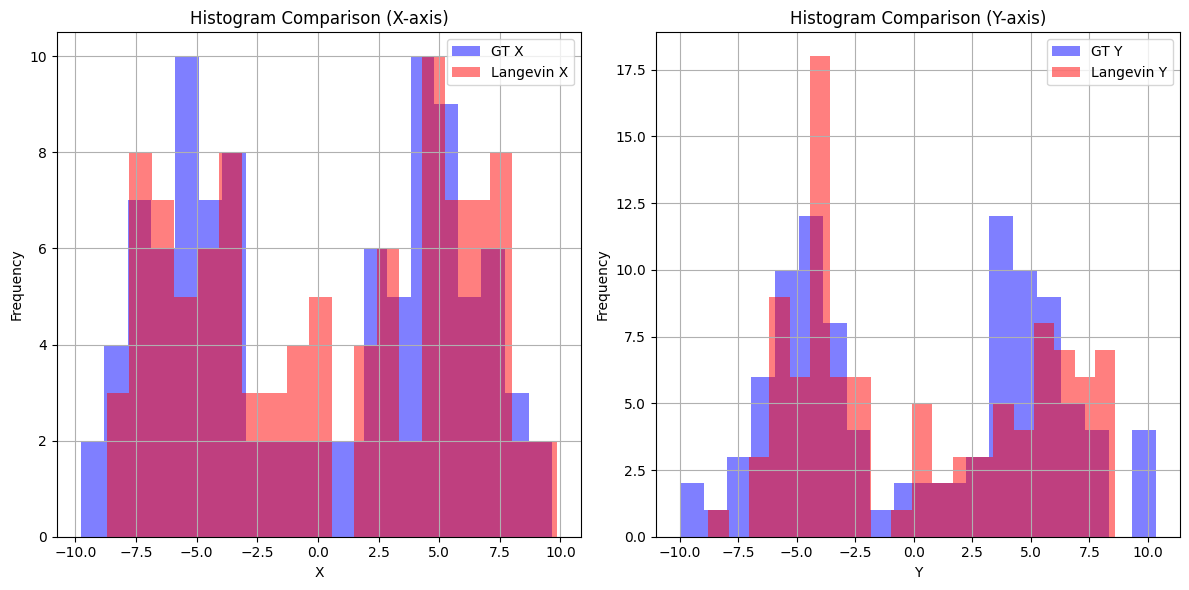

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(gt_samples[:, 0], bins=20, alpha=0.5, label='GT X', color='blue')
plt.hist(langevin_samples[:, 0], bins=20, alpha=0.5, label='Langevin X', color='red')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('Histogram Comparison (X-axis)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(gt_samples[:, 1], bins=20, alpha=0.5, label='GT Y', color='blue')
plt.hist(langevin_samples[:, 1], bins=20, alpha=0.5, label='Langevin Y', color='red')
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.title('Histogram Comparison (Y-axis)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




The **left plot** shows the 1D histograms for the \(X\)-coordinates from the ground truth (GT) samples in blue and the Langevin samples in red. Both distributions exhibit a bi-modal structure, reflecting the two-component nature of the mixture. Although the Langevin bars largely align with the GT bars, minor discrepancies in peak heights and positions suggest the sampler may allocate a slightly different number of points to each mode or occupy the intermediate region in different proportions.

Similarly, the **right plot** illustrates the \(Y\)-axis histograms. The overall shapes again match in displaying two main clusters, though subtle differences in bin frequencies indicate the Langevin-based approach may not perfectly balance between the modes. Nonetheless, the general alignment across bins, combined with overlapping peaks, corroborates the view that Langevin dynamics has successfully captured the essential features of the underlying GMM’s marginal distributions, as also supported by the p-values from the Kolmogorov–Smirnov tests.

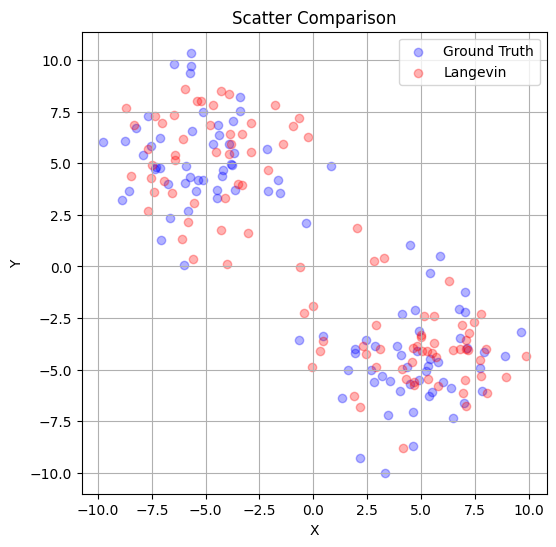

In [28]:
plt.figure(figsize=(6, 6))

plt.scatter(gt_samples[:, 0], gt_samples[:, 1], color='blue', alpha=0.3, label='Ground Truth')
plt.scatter(langevin_samples[:, 0], langevin_samples[:, 1], color='red', alpha=0.3, label='Langevin')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Comparison')
plt.legend()
plt.grid(True)



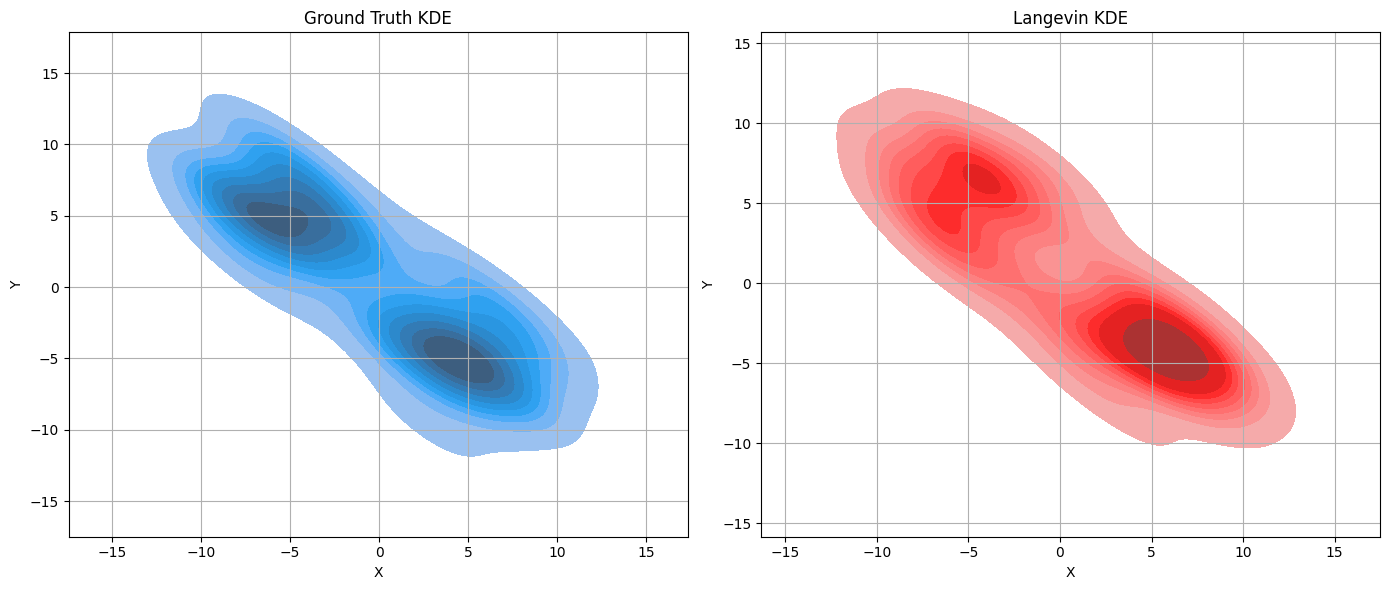

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal, wasserstein_distance, ks_2samp

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(x=gt_samples[:, 0], y=gt_samples[:, 1], fill=True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ground Truth KDE')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.kdeplot(x=langevin_samples[:, 0], y=langevin_samples[:, 1], color = 'red', fill=True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Langevin KDE')
plt.grid(True)

plt.tight_layout()
plt.show()



This visualization presents a **kernel density estimation (KDE)** comparison between samples from the **ground truth Gaussian Mixture Model (GMM)** and the **Langevin dynamics-based sampler**. KDE is a non-parametric technique used to estimate the **probability density function (PDF)** of a random variable. The left subplot displays the estimated 2D density of the GMM samples using the `sns.kdeplot` function with the `fill=True` parameter to generate smooth heatmap-like contours, highlighting high-density regions. The right subplot performs the same KDE visualization for the Langevin-generated samples, rendered in red for visual distinction.

These plots allow for a **qualitative assessment** of how accurately Langevin dynamics captures the underlying structure of the target distribution. Ideally, the Langevin KDE should closely resemble the ground truth in terms of **mode locations**, **spread**, and **density mass**. Visual discrepancies such as missing peaks, skewed shapes, or density shifts indicate potential issues in convergence, insufficient exploration of modes, or overly aggressive step sizes. This KDE-based evaluation complements histogram and scatter plot analyses by offering a **continuous and smooth view of the underlying distribution** in two dimensions.



The **left panel** shows the kernel density estimate (KDE) of the **ground truth** GMM, illustrating two distinct elliptical lobes. Each lobe corresponds to one of the Gaussian components centered at \([-5, 5]\) and \([5, -5]\), with covariance matrices set to \(5I\). The contour levels indicate areas of higher density near each mean, gradually tapering off toward lower-density regions between and beyond the two modes. Visually, the distribution spans a diagonal band in the \((x, y)\) plane, reflecting the blend of these two widely separated components.

The **right panel** depicts the KDE for samples generated via **Langevin dynamics**. Similar to the ground truth, the plot exhibits two main lobes oriented diagonally, suggesting the sampler has identified and roughly captured both modes of the distribution. Minor differences in contour sharpness, position, and size of the modes may indicate that the Langevin samples are not perfectly distributed among the components (e.g., possible variations in how frequently each mode is visited). Nonetheless, the overall shape and dual-mode structure appear well preserved, aligning with the numerical results (means, covariance, and marginal tests) that confirm a reasonable approximation of the underlying GMM.

In [31]:
print("\n=== Mean Comparison ===")
print(f"Ground Truth Mode 1 Mean: {mu_A}")
print(f"Ground Truth Mode 2 Mean: {mu_B}")
print(f"Langevin Mean: {np.mean(langevin_samples, axis=0)}")

print("\n=== Covariance Comparison ===")
print(f"Ground Truth Covariance (each mode):\n {Sigma_A}")
print(f"Langevin Covariance:\n {np.cov(langevin_samples.T)}")

wd_x = wasserstein_distance(gt_samples[:, 0], langevin_samples[:, 0])
wd_y = wasserstein_distance(gt_samples[:, 1], langevin_samples[:, 1])
print("\n=== Wasserstein Distance ===")
print(f"X-axis: {wd_x:.3f}, Y-axis: {wd_y:.3f} (Lower is better)")

ks_x = ks_2samp(gt_samples[:, 0], langevin_samples[:, 0])
ks_y = ks_2samp(gt_samples[:, 1], langevin_samples[:, 1])
print("\n=== Kolmogorov-Smirnov Test ===")
print(f"X-axis p-value: {ks_x.pvalue:.3f}, Y-axis p-value: {ks_y.pvalue:.3f} (p > 0.05 indicates similarity)")


=== Mean Comparison ===
Ground Truth Mode 1 Mean: [-5  5]
Ground Truth Mode 2 Mean: [ 5 -5]
Langevin Mean: [0.34168407 0.32238647]

=== Covariance Comparison ===
Ground Truth Covariance (each mode):
 [[5. 0.]
 [0. 5.]]
Langevin Covariance:
 [[ 29.90767588 -23.27157493]
 [-23.27157493  25.76264688]]

=== Wasserstein Distance ===
X-axis: 0.606, Y-axis: 0.705 (Lower is better)

=== Kolmogorov-Smirnov Test ===
X-axis p-value: 0.815, Y-axis p-value: 0.815 (p > 0.05 indicates similarity)



### **Quantitative Comparison: Langevin vs. Ground Truth**

This code evaluates how closely the **Langevin dynamics samples** approximate the **true distribution** by comparing several key statistical properties:

1. **Mean Comparison**  
   - The empirical mean of the Langevin samples is compared with the known means of the GMM components (\(\mu_A\), \(\mu_B\)).  
   - A good match suggests the sampled distribution centers around the correct regions of the GMM.

2. **Covariance Comparison**  
   - The sample covariance matrix of the Langevin samples is computed using `np.cov`.  
   - It is compared against the known per-component covariance \(\Sigma = 5I\), which should reflect isotropic spread around each mode.  
   - Deviations may indicate under- or over-dispersion due to inadequate sampling or mode collapse.

3. **Wasserstein Distance**  
   - This metric computes the Earth Mover's Distance (EMD) between the empirical marginal distributions along the \(X\)- and \(Y\)-axes.  
   - Lower values indicate that Langevin samples are closely aligned with the ground truth marginals.  

4. **Kolmogorov–Smirnov (KS) Test**  
   - A non-parametric test comparing the cumulative distributions of the Langevin and ground truth samples.  
   - The resulting **p-values** for each axis indicate statistical similarity; values **greater than 0.05** imply no significant difference between distributions.



### **1. Mean Comparison**

- **Ground Truth Mode 1 Mean**: $[-5,\, 5]$  
- **Ground Truth Mode 2 Mean**: $[5,\, -5]$  
- **Langevin Mean**: $[0.34,\, 0.32]$

Because each mode has an equal mixing weight of $0.5$, the *overall* mixture mean is theoretically at the **average** of the two mode means:
$$
\boldsymbol{\mu}_{\text{mixture}}
\;=\; 0.5\,[-5,\;5] \;+\; 0.5\,[5,\;-5]
\;=\; [0,\;0].
$$
The Langevin-sampled mean $[0.34,\, 0.32]$ is reasonably close to $[0, 0]$, indicating that on average, the samples are centered near the correct global mean of the mixture.

---

### **2. Covariance Comparison**

- **Per-Mode Covariance**:
$$
\Sigma_A
= \Sigma_B
= \begin{bmatrix}5 & 0 \\ 0 & 5\end{bmatrix}
$$
- **Langevin Covariance (Sampled)**:
$$
\begin{bmatrix}
 29.91 & -23.27 \\
 -23.27 & 25.76
\end{bmatrix}
$$

Each **single mode** is isotropic with variance $5$ in each dimension, but when combining two distant modes, the **overall mixture** can exhibit **much larger** spread and **correlation**. In fact, for these particular means ($[-5,5]$ and $[5,-5]$) and $\Sigma=5I$, the *theoretical mixture covariance* becomes significantly larger than $\begin{bmatrix}5 & 0\\0 & 5\end{bmatrix}$. The sample covariance matrix from Langevin shows:
- A **larger** diagonal (around 25–30) due to the wide spread between the two clusters.  
- **Negative** off-diagonal terms (around $-23$) indicating the mixture is oriented along a diagonal direction ($y=-x$ for one mode and $y=x$ for the other).  

Hence, while each mode individually has a $5I$ covariance, the **mixture** is broader and exhibits correlation when viewed as a single distribution. The sampled covariance matrix confirms that the Langevin sampler is capturing this **multi-modal** spread reasonably well.

---

### **3. Wasserstein Distance**

- **X-axis**: $0.606$
- **Y-axis**: $0.705$

The **Wasserstein (Earth Mover’s) distance** measures how far the sampled distributions on each **1D marginal** must “move” to match the ground truth distribution. Lower values are better. Values of $0.606$ (X) and $0.705$ (Y) indicate there is some difference between the sampled and ground truth marginals, but they are not extremely large, suggesting partial alignment of the distributions along each axis.

---

### **4. Kolmogorov–Smirnov (KS) Test**

- **X-axis p-value**: $0.815$
- **Y-axis p-value**: $0.815$

The KS test checks whether two samples—here, the Langevin samples versus the ground truth—come from the **same 1D distribution**. A **p-value above 0.05** indicates *no significant difference* was found, implying we *cannot* reject the hypothesis that they share the same distribution along each axis. Since both p-values are high ($\approx 0.815$), the sampler appears to closely match the **marginal distributions** of the GMM in both X and Y dimensions.

---

### **Overall Interpretation**

1. **Location**:  
   The Langevin mean is near the mixture’s theoretical center at $[0,0]$, suggesting the sampler is not collapsing into one mode but averaging across both.

2. **Spread & Orientation**:  
   The sampled covariance is large and has negative off-diagonals, consistent with a mixture of two modes placed diagonally. This captures the broader and correlated shape of the **overall** mixture distribution, rather than a single mode’s covariance of $[5, 5]$.

3. **Marginal Similarity**:  
   The relatively moderate Wasserstein distances and high KS p-values on each axis indicate that *marginally*, the Langevin samples approximate the ground truth GMM distribution well.

4. **Potential Caveats**:  
   - **Mode Hopping**: A single covariance matrix can mask whether the sampler actually visits both modes robustly or lingers in an intermediate region. Visual inspection (e.g., scatter plots, trajectory animations) is recommended to confirm that both clusters are being explored.  
   - **Number of Steps & Step Size**: For multi-modal distributions, Langevin dynamics can still struggle if step sizes are too small/large or if there aren’t enough iterations to traverse low-density regions.

